In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory data analysis and preprocessing

In [2]:
df = pd.read_csv('WinnipegDataset.txt')
df.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [3]:
#df = df[0:50000]
df.label.value_counts()

6    85074
3    75673
4    74067
5    47117
1    39162
2     3598
7     1143
Name: label, dtype: int64

In [4]:
class_share = pd.Series(100 * df.label.value_counts(normalize=True)).sort_index()
print('Class share\n')
for i in range(0,7):
    print(f'Class {class_share.index[i]}: {class_share.iloc[i]:.2f} %')
    
#Below shows a somehow balanced distrbution, with exception in class 2 (Pea) and class 7 (Broadleaf)

Class share

Class 1: 12.02 %
Class 2: 1.10 %
Class 3: 23.22 %
Class 4: 22.73 %
Class 5: 14.46 %
Class 6: 26.11 %
Class 7: 0.35 %


Text(0, 0.5, 'Share (%)')

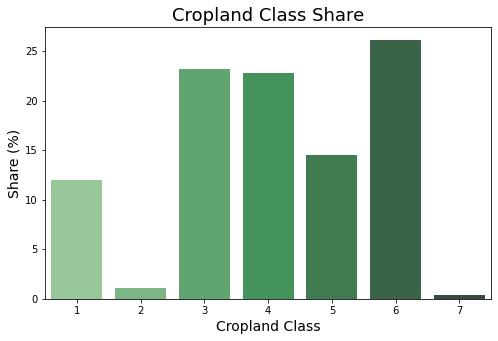

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(ax=ax, x = class_share.index, y = class_share, palette='Greens_d')
plt.title('Cropland Class Share', fontsize=18)
plt.xlabel('Cropland Class', fontsize=14)
plt.ylabel('Share (%)', fontsize=14)

### Correlation

In [6]:
highly_correlated_feature_pairs = []
highly_correlated_features_to_drop = []

correlation_matrix = df.corr().abs()
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
for row in range(upper_matrix.shape[0]):
    for column in range(upper_matrix.shape[1]):
        if upper_matrix.iloc[row, column] > 0.95:
            highly_correlated_feature_pairs.append([row, column, upper_matrix.iloc[row, column]])
highly_correlated_features_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.95)]
print(highly_correlated_features_to_drop)



/var/folders/t8/4cz6934j38v_m257qfz846ym0000gn/T/ipykernel_19802/3470960586.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


['f2', 'f5', 'f6', 'f13', 'f15', 'f16', 'f17', 'f18', 'f30', 'f32', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f45', 'f46', 'f47', 'f49', 'f53', 'f54', 'f55', 'f62', 'f64', 'f65', 'f66', 'f67', 'f79', 'f81', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f92', 'f94', 'f95', 'f96', 'f98', 'f102', 'f108', 'f109', 'f111', 'f112', 'f113', 'f114', 'f116', 'f117', 'f120', 'f121', 'f127', 'f129', 'f133', 'f135', 'f146', 'f147', 'f148', 'f149', 'f152', 'f153', 'f154', 'f156', 'f157', 'f158', 'f159', 'f165', 'f171', 'f173']


In [7]:
##Dropping highly correlated features
df = df.drop(df[highly_correlated_features_to_drop], axis=1)

In [8]:
##the number of features was substantially reduced from 174 down to 102
nr_features = df.shape[1] - 1
print(f'Optimized number of features: {nr_features}')

Optimized number of features: 102


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis = 1)
y = df.label

# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Classification

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#change to fit_resample
#X_train, y_train = ros.fit_resample(Xtrain, y_train)
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    model = Model
    
    #Xtrain = pca.fit_transform(Xtrain)
    #Xtest = pca.transform(Xtest)
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    #Evaluating models
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    
    # Printing evaluation metrics
    print('Accuracy:', accuracy, ', Precision:', precision, ', Recall:', recall,' ,F1:', f1)


In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression())

Accuracy: 0.7100986695720226 , Precision: 0.7100986695720226 , Recall: 0.7100986695720226  ,F1: 0.7100986695720226


/Users/patriciasiuhaliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
modeling(GaussianNB())

Accuracy: 0.9252535792655792 , Precision: 0.9252535792655792 , Recall: 0.9252535792655792  ,F1: 0.9252535792655792


In [13]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
modeling(DecisionTreeClassifier())

Accuracy: 0.98798471619071 , Precision: 0.98798471619071 , Recall: 0.98798471619071  ,F1: 0.98798471619071


### Unsupervised Clustering

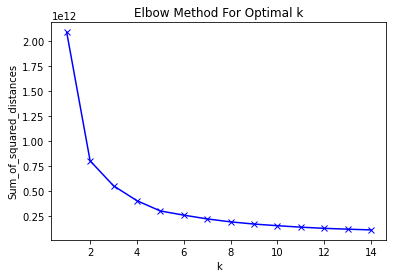

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


# try different K value and find the best K for KMeans
# Assumption: SSE is smaller, it is better

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### choosing 4 clusters 

In [15]:
kmeans=KMeans(n_clusters= 4)
kmeans.fit(X)#training the unsupervised data

KMeans(n_clusters=4)

In [16]:
X2 = df.drop('label', axis = 1) #dropping label
km_pred = kmeans.predict(X2)
X2['cluster'] = km_pred#adding a new column to X2 with the cluster index
y2 = df.label

#after adding the column we check if it is improving the accuracy of supervised learning or not
# This way we evaliuate unsupervised, as there is not way to evalute unsupervised
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

def modeling(Model, Xtrain = X_train, Xtest = X_test):
    model = Model
    
    #Xtrain = pca.fit_transform(Xtrain)
    #Xtest = pca.transform(Xtest)
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    #Evaluating models
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    
    # Printing evaluation metrics
    print('Accuracy:', accuracy, ', Precision:', precision, ', Recall:', recall,' ,F1:', f1)

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression())

Accuracy: 0.6942317430601378 , Precision: 0.6942317430601378 , Recall: 0.6942317430601378  ,F1: 0.6942317430601378


/Users/patriciasiuhaliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
modeling(GaussianNB())

Accuracy: 0.9266653367501957 , Precision: 0.9266653367501957 , Recall: 0.9266653367501957  ,F1: 0.9266653367501957


In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
modeling(DecisionTreeClassifier())

Accuracy: 0.9873709085887029 , Precision: 0.9873709085887029 , Recall: 0.9873709085887029  ,F1: 0.9873709085887029


In [20]:
#After adding a cluster variable tothe features there is not much differnce in accuracy precision or recall
# so we can say that unsupervised learning is not helpful in predicting the label

### With PCA (95%)

In [21]:
X = df.drop('label', axis = 1)
y = df.label

# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)# only those columns which explains 80% of the variance (of max accuracy) of the data
#feature reduction pca helps to reduce computational load on system

#change to fit_resample
#X_train, y_train = ros.fit_resample(Xtrain, y_train)
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    model = Model
    
    Xtrain = pca.fit_transform(Xtrain)# MAKES A matrix removing the not needed columns based on PCA
    Xtest = pca.transform(Xtest)# MAKES A matrix removing the not needed columns based on PCA
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    #Evaluating models
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    
    # Printing evaluation metrics
    print('Accuracy:', accuracy, ', Precision:', precision, ', Recall:', recall,' ,F1:', f1)

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression())

Accuracy: 0.6996946307180014 , Precision: 0.6996946307180014 , Recall: 0.6996946307180014  ,F1: 0.6996946307180014


/Users/patriciasiuhaliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
modeling(GaussianNB())

Accuracy: 0.6431169150029923 , Precision: 0.6431169150029923 , Recall: 0.6431169150029923  ,F1: 0.6431169150029923


In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
modeling(DecisionTreeClassifier())

Accuracy: 0.6820783525403962 , Precision: 0.6820783525403962 , Recall: 0.6820783525403962  ,F1: 0.6820783525403962


### With PCA ( 80% )

In [25]:
X = df.drop('label', axis = 1)
y = df.label

# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)# only those columns which explains 80% of the variance (of max accuracy) of the data
#feature reduction pca helps to reduce computational load on system

#change to fit_resample
#X_train, y_train = ros.fit_resample(Xtrain, y_train)
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    model = Model
    
    Xtrain = pca.fit_transform(Xtrain)# MAKES A matrix removing the not needed columns based on PCA
    Xtest = pca.transform(Xtest)# MAKES A matrix removing the not needed columns based on PCA
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    #Evaluating models
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    
    # Printing evaluation metrics
    print('Accuracy:', accuracy, ', Precision:', precision, ', Recall:', recall,' ,F1:', f1)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression())

Accuracy: 0.5185906977457916 , Precision: 0.5185906977457916 , Recall: 0.5185906977457916  ,F1: 0.5185906977457916


/Users/patriciasiuhaliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
modeling(GaussianNB())

Accuracy: 0.5344269338775761 , Precision: 0.5344269338775761 , Recall: 0.5344269338775761  ,F1: 0.5344269338775761


In [28]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
modeling(DecisionTreeClassifier())

Accuracy: 0.42291343778292695 , Precision: 0.42291343778292695 , Recall: 0.42291343778292695  ,F1: 0.4229134377829269


### With PCA (30%)

In [29]:
X = df.drop('label', axis = 1)
y = df.label

# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
pca = PCA(n_components=0.3)

#change to fit_resample
#X_train, y_train = ros.fit_resample(Xtrain, y_train)
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    model = Model
    
    Xtrain = pca.fit_transform(Xtrain)
    Xtest = pca.transform(Xtest)
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    #Evaluating models
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    
    # Printing evaluation metrics
    print('Accuracy:', accuracy, ', Precision:', precision, ', Recall:', recall,' ,F1:', f1)

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
modeling(LogisticRegression())

Accuracy: 0.5249282612365154 , Precision: 0.5249282612365154 , Recall: 0.5249282612365154  ,F1: 0.5249282612365154


/Users/patriciasiuhaliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
modeling(GaussianNB())

Accuracy: 0.5326622370218055 , Precision: 0.5326622370218055 , Recall: 0.5326622370218055  ,F1: 0.5326622370218055


In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
modeling(DecisionTreeClassifier())

Accuracy: 0.42384949437598785 , Precision: 0.42384949437598785 , Recall: 0.42384949437598785  ,F1: 0.42384949437598785
